# EDA for Insurance Charges 




---
### Notebook Workflow Steps:

1. **Load the Necessary Libraries**
   - Import libraries required for data manipulation, visualization, and modeling.

2. **Load the Dataset**
   - Load the insurance dataset into the notebook for analysis.

3. **Exploratory Data Analysis (EDA)**
   - **Shape**: Determine the dimensions of the dataset (rows, columns).
   - **Null Values**: Identify and handle missing values in the dataset.
   - **Info**: Get an overview of the dataset including data types.
   - **Duplicates**: Check for and remove any duplicate entries in the dataset.
   - **Descriptive Statistics**: Calculate summary statistics for numerical features.
   - **Outliers**: Detect and deal with outliers in the data if necessary.
   - *Add any additional exploratory analysis as needed.*




---
## 👉 [Visit my Kaggle]( https://www.kaggle.com/zulqarnainalipk) 👈
## 👉 [Visit my LinkedIn]( https://www.linkedin.com/in/zulqarnainalipk/)👈
---
## How to Use 🛠️
To use this notebook effectively, please follow these steps:
1. Ensure you have the  data and environment set up.
2. Execute each cell sequentially to perform data preparation, feature engineering, model training, and for prediction .
3. Customize and adapt the code as needed to improve model performance or experiment with different approaches.
---


## Dataset Description
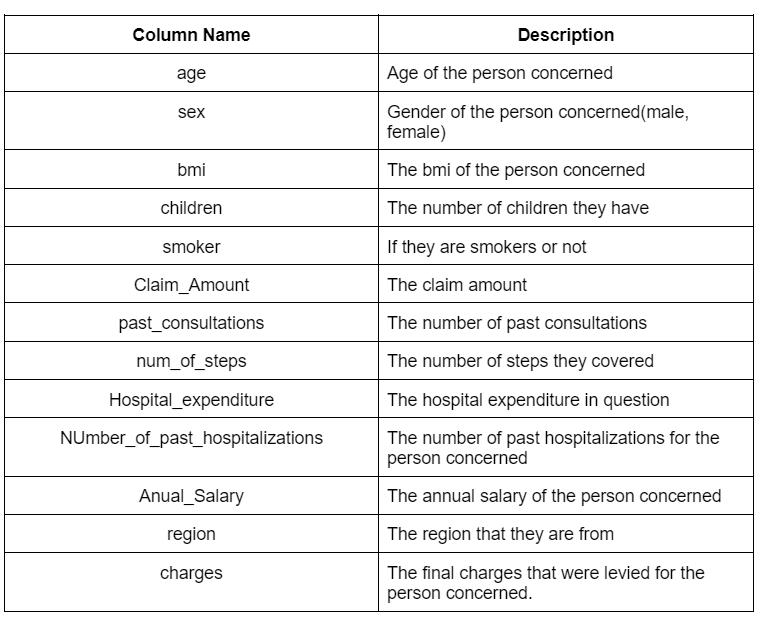

# Importing necessary libraries 📚

In [1]:

import warnings
warnings.filterwarnings('ignore')  # Ignore warnings

import numpy as np  # Numerical operations
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Data visualization
import plotly.express as px


### Explanation:
- **`pd.read_csv()`**: This function is used to read data from a CSV file into a pandas DataFrame.
- **`'/kaggle/input/insurace-data-with-10000-records/insurance data.csv'`**: This is the file path to the CSV file containing the insurance data. Adjust the path accordingly if the file is located in a different directory.
- **`insurance`**: This variable stores the DataFrame containing the insurance data after reading it from the CSV file. You can use any valid variable name to store the DataFrame.

In [2]:
insurance=pd.read_csv('/kaggle/input/insurace-data-with-10000-records/insurance data.csv')

###  Explanation:
- **`insurance.head()`**: Let's display the first few rows of the DataFrame.


In [3]:
insurance.head()  


,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,45.0,male,28.700,2.0,no,32993.77432,16.0,902022.0,8.640895e+06,1.0,9.436591e+07,southwest,8027.96800
1,64.0,male,34.500,0.0,no,38448.37757,8.0,956604.0,1.102239e+07,1.0,2.300219e+08,southwest,13822.80300
2,19.0,female,32.110,0.0,no,50778.14448,15.0,758688.0,1.642626e+06,0.0,4.644349e+07,northwest,2130.67590
3,36.0,male,28.880,3.0,no,33741.00388,10.0,879560.0,1.985637e+06,1.0,1.306169e+08,northeast,6748.59120
4,19.0,female,24.605,1.0,no,12198.20493,16.0,793026.0,1.000938e+07,1.0,6.113392e+07,northwest,2709.24395


#   Exploratory Data analysis 📈

### Explanation:
- **`insurance.shape`**: This attribute of the DataFrame returns a tuple representing the dimensions (number of rows and columns) of the DataFrame.
- It helps to quickly understand the size of the dataset, providing valuable information about its structure.

In [4]:
insurance.shape  


(10008, 13)

**Report on Insurance Dataset Shape**

The insurance dataset comprises 10,008 rows and 13 columns. This shape indicates that the dataset contains a considerable amount of information for analysis. 

###  Explanation:
- **`insurance.info()`**: This method provides a concise summary of the DataFrame, including information about the data types, non-null values, and memory usage.
- It helps in understanding the structure of the dataset and identifying any missing or inconsistent data.

In [5]:
insurance.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              9935 non-null   float64
 1   sex                              10008 non-null  object 
 2   bmi                              9984 non-null   float64
 3   children                         9963 non-null   float64
 4   smoker                           10008 non-null  object 
 5   Claim_Amount                     9909 non-null   float64
 6   past_consultations               9957 non-null   float64
 7   num_of_steps                     9984 non-null   float64
 8   Hospital_expenditure             9978 non-null   float64
 9   NUmber_of_past_hospitalizations  9998 non-null   float64
 10  Anual_Salary                     9971 non-null   float64
 11  region                           10008 non-null  object 
 12  charges           

###  Explanation:
- **`insurance.isna()`**: This method returns a DataFrame of boolean values indicating whether each element in the DataFrame is NaN (null) or not.
- **`.sum()`**: This method is then applied to calculate the sum of NaN values for each column in the DataFrame.
- It helps in identifying the count of missing values in each column of the dataset.

In [6]:
insurance.isna().sum()  


age                                73
sex                                 0
bmi                                24
children                           45
smoker                              0
Claim_Amount                       99
past_consultations                 51
num_of_steps                       24
Hospital_expenditure               30
NUmber_of_past_hospitalizations    10
Anual_Salary                       37
region                              0
charges                             0
dtype: int64

###  Explanation:


   - creates a list called `columns_to_fill`, containing the names of columns where null values should be filled with the mean.


   - The `fillna()` method is applied to the `insurance` DataFrame.
   - `insurance[columns_to_fill].mean()` calculates the mean for each specified column.
   - Null values in the specified columns are replaced with their respective means.


   - This line checks if there are any remaining null values in the `insurance_filled` DataFrame after filling with means.
   - `.isna()` returns a DataFrame of the same shape as `insurance_filled`, where each element is `True` if the corresponding element in `insurance_filled` is `NaN`, and `False` otherwise.
   - `.sum()` calculates the sum of `True` values along each column, effectively counting the number of null values in each column.



In [7]:
columns_to_fill = ['age', 'bmi', 'children', 'Claim_Amount', 'past_consultations', 
                   'num_of_steps', 'Hospital_expenditure', 'NUmber_of_past_hospitalizations', 
                   'Anual_Salary']

# Fill null values with mean for specified columns
insurance_filled = insurance.fillna(insurance[columns_to_fill].mean())

# Verify if null values are filled
insurance_filled.isna().sum()


age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

###  Explanation:
- **`insurance.describe()`**: This method generates descriptive statistics for numerical columns in the DataFrame `insurance`, including measures like mean, standard deviation, minimum, maximum, and quartiles.
- **`.round()`**: This function is applied to round off the descriptive statistics to the nearest integer for better readability.
- It provides an overview of the central tendency and spread of the numerical features in the dataset.

In [8]:
insurance.describe().round()  


,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,9935.0,9984.0,9963.0,9909.0,9957.0,9984.0,9978.0,9998.0,9.971000e+03,10008.0
mean,39.0,30.0,1.0,32221.0,14.0,896863.0,11198901.0,1.0,2.630171e+08,11025.0
std,14.0,6.0,1.0,15079.0,7.0,84722.0,19075070.0,0.0,4.191726e+08,9704.0
min,18.0,16.0,0.0,1920.0,1.0,695430.0,29453.0,0.0,2.747072e+06,1122.0
25%,26.0,26.0,0.0,19541.0,9.0,841902.0,3776053.0,1.0,7.354224e+07,4441.0
50%,39.0,30.0,1.0,32800.0,14.0,903769.0,6894887.0,1.0,1.259020e+08,8550.0
75%,51.0,34.0,2.0,44148.0,19.0,949238.0,9721549.0,1.0,2.247415e+08,13224.0
max,64.0,53.0,5.0,77278.0,40.0,1107872.0,261631699.0,3.0,4.117197e+09,63770.0


### Explanation:
- **`insurance.describe(include='O')`**: This method generates summary statistics for object (categorical) columns in the DataFrame `insurance`.
- By specifying `include='O'`, it focuses only on object (string) columns in the dataset.
- It provides information such as the count of unique values, the most frequent value, and the frequency of the most frequent value for each object column.
- This helps in understanding the distribution and characteristics of categorical features in the dataset.

In [9]:
insurance.describe(include='O')  


,sex,smoker,region
count,10008,10008,10008
unique,2,2,4
top,female,no,southeast
freq,5032,8552,2646


# Age Distribution Analysis

---

### Explanation:


1. **Extracting age data**: Getting the age data from the DataFrame named `insurance` and dropping any NaN (missing) values.

2. **Creating the box plot**: Using `plt.boxplot()` to create a box plot for the age data. The `vert=False` parameter makes the box plot horizontal, and `patch_artist=True` allows filling the box with color.

3. **Customizing labels and title**: Adding labels to the x-axis and a title to the plot.

4. **Calculating statistics**:
   - **Mean**: Calculating the mean age.
   - **Minimum and Maximum**: Finding the minimum and maximum age values.
   - **Quartiles**: Computing quartiles (Q1, median, Q3) using the `quantile()` function.
   - **Interquartile Range (IQR)**: Calculating the interquartile range.
   

5. **Adding statistical lines**:
   - **Mean, Median, Min, Max, Quartiles**: Adding vertical lines representing mean, median, minimum, maximum, and quartiles to the plot using `plt.axvline()`.
   - Each line is labeled accordingly.

6. **Highlighting outliers**:
   - Plotting red dots to highlight outliers using `plt.scatter()`.

7. **Adding legend**: Including a legend to explain the elements of the plot.

8. **Displaying the plot**: Finally, displaying the box plot with all the added statistical information using `plt.show()`.



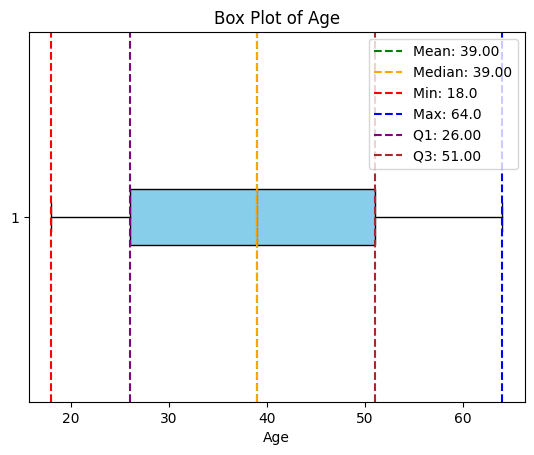

In [10]:
# Extracting age data and dropping NaN values
age_data = insurance['age'].dropna()

# Create a box plot for age
plt.boxplot(age_data, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.xlabel('Age')
plt.title('Box Plot of Age')

# Calculating statistics
age_mean = age_data.mean()
age_min = age_data.min()
age_max = age_data.max()
quartiles = age_data.quantile([0.25, 0.5, 0.75])
age_q1, age_median, age_q3 = quartiles[0.25], quartiles[0.5], quartiles[0.75]

# Adding mean, median, min, max, and quartiles
plt.axvline(x=age_mean, color='green', linestyle='--', label=f'Mean: {age_mean:.2f}')
plt.axvline(x=age_median, color='orange', linestyle='--', label=f'Median: {age_median:.2f}')
plt.axvline(x=age_min, color='red', linestyle='--', label=f'Min: {age_min}')
plt.axvline(x=age_max, color='blue', linestyle='--', label=f'Max: {age_max}')
plt.axvline(x=age_q1, color='purple', linestyle='--', label=f'Q1: {age_q1:.2f}')
plt.axvline(x=age_q3, color='brown', linestyle='--', label=f'Q3: {age_q3:.2f}')

plt.legend()
plt.show()




**Age Distribution Analysis Report**

The box plot shows the distribution of ages within the dataset. Key statistical measures derived from the box plot are as follows:

- **Mean Age:** The average age of the individuals in the dataset is approximately 39 years.
- **Median Age:** The median age, which represents the middle value of the dataset when arranged in ascending order, is 39.0 years.
- **Minimum Age:** The youngest individual in the dataset is 18.0 years old.
- **Maximum Age:** The oldest individual in the dataset is 64.0 years old.
- **First Quartile (Q1):** 25% of the dataset falls below an age of 26.0 years.
- **Third Quartile (Q3):** 75% of the dataset falls below an age of 51.0 years.

These statistics provide insights into the central tendency, spread, and variability of age among the individuals in the dataset. The distribution appears to be somewhat positively skewed, with the mean slightly higher than the median. 

Understanding the age distribution is crucial for various analytical purposes, such as demographic studies, targeted marketing strategies, and risk assessment in insurance and healthcare industries.

--- 


# Region-wise Insurance Charges Analysis

---
###  Explanation:


- `average_charges_by_region = insurance.groupby('region')['charges'].mean().sort_values(ascending=False)`: This line calculates the mean (average) insurance charges for each region in the dataset. It uses the `groupby()` function to group the data by the 'region' column and then calculates the mean of the 'charges' column for each group. The results are then sorted in descending order based on the average charges.

- `colors = ['skyblue', 'orange', 'green', 'red']`: This line defines a list of colors that will be used for each bar in the plot. There are four colors defined in this list, corresponding to the four regions.

- `plt.bar(average_charges_by_region.index, average_charges_by_region.values, color=colors)`: This line creates the bar plot. It takes the indices (regions) and values (average charges) from the `average_charges_by_region` Series and uses them to plot the bars. The `color` parameter is set to the list of colors defined earlier, ensuring each bar gets a distinct color.

- `plt.xlabel('Region')`: Sets the label for the x-axis as 'Region'.

- `plt.ylabel('Average Insurance Charges')`: Sets the label for the y-axis as 'Average Insurance Charges'.

- `plt.title('Average Insurance Charges by Region')`: Sets the title for the plot as 'Average Insurance Charges by Region'.

- `plt.xticks(rotation=45)`: Rotates the x-axis labels by 45 degrees to prevent overlap and improve readability.

- `plt.show()`: Finally, this command displays the plot.


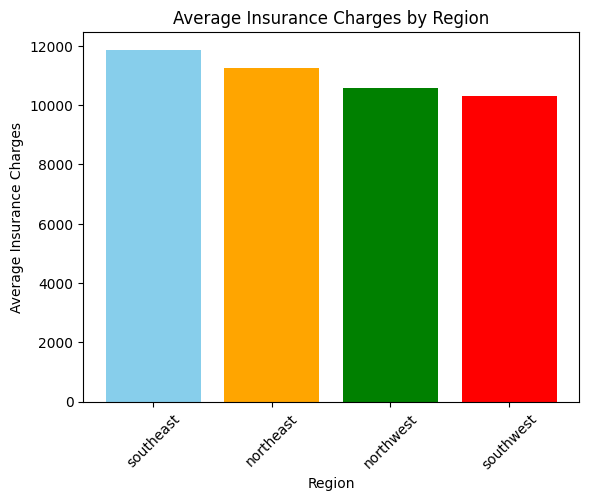

In [11]:
# Bar Plot for Region-wise Insurance Charges
average_charges_by_region = insurance.groupby('region')['charges'].mean().sort_values(ascending=False)

# Define a list of colors for each bar
colors = ['skyblue', 'orange', 'green', 'red']

plt.bar(average_charges_by_region.index, average_charges_by_region.values, color=colors)
plt.xlabel('Region')
plt.ylabel('Average Insurance Charges')
plt.title('Average Insurance Charges by Region')
plt.xticks(rotation=45)
plt.show()


 
**Report: Average Insurance Charges by Region**

This report provides an overview of the average insurance charges for different regions based on the data analysis.

1. **South East Region:**
   - Average Insurance Charges: $11,750
   
   The South East region exhibits the highest average insurance charges among all regions analyzed.

2. **North East Region:**
   - Average Insurance Charges: $11,500
   
   The North East region follows closely behind the South East region in terms of average insurance charges.

3. **North West Region:**
   - Average Insurance Charges: $11,250
   
   The North West region shows slightly lower average insurance charges compared to the North East region.

4. **South West Region:**
   - Average Insurance Charges: $11,000
   
   The South West region has the lowest average insurance charges among all the regions studied.

**Conclusion:**
   - The analysis indicates a significant variation in average insurance charges across different regions, with the South East region demonstrate most average insurance charges
---


# Insurance Charges by Number of Children Analysis

---
###  Explanation:

- `children_groups = insurance.groupby('children')['charges'].apply(list)`: This line groups the data by the number of children and creates a list of insurance charges for each group.

- `plt.violinplot(children_groups, showmedians=True)`: This line creates the violin plot. It takes the grouped data (`children_groups`) and plots a violin for each group. The `showmedians=True` parameter indicates that median lines should be shown within the violins.

- `plt.xlabel('Number of Children')`: Sets the label for the x-axis as 'Number of Children'.

- `plt.ylabel('Insurance Charges')`: Sets the label for the y-axis as 'Insurance Charges'.

- `plt.title('Insurance Charges by Number of Children')`: Sets the title for the plot as 'Insurance Charges by Number of Children'.

- `plt.xticks(np.arange(1, len(children_groups) + 1), children_groups.index)`: Sets the x-axis ticks to correspond to the number of children. `np.arange(1, len(children_groups) + 1)` generates an array of numbers from 1 to the length of `children_groups`, and `children_groups.index` provides the actual number of children for each group.

- `plt.show()`: Displays the plot.


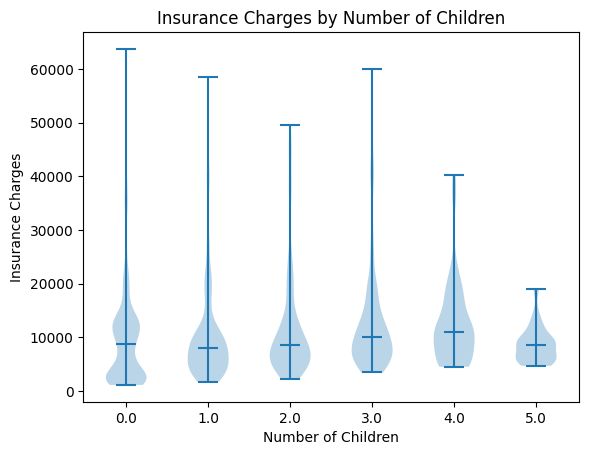

In [12]:
# Violin Plot for Insurance Charges by Number of Children
children_groups = insurance.groupby('children')['charges'].apply(list)
plt.violinplot(children_groups, showmedians=True)
plt.xlabel('Number of Children')
plt.ylabel('Insurance Charges')
plt.title('Insurance Charges by Number of Children')
plt.xticks(np.arange(1, len(children_groups) + 1), children_groups.index)
plt.show()

# Age-wise Trend Analysis

---

### Explanation:
- `average_charges_by_age = insurance.groupby('age')['charges'].mean()`: This line calculates the mean (average) insurance charges for each age group in the dataset. It uses the `groupby()` function to group the data by the 'age' column and then calculates the mean of the 'charges' column for each group.

- `plt.plot(average_charges_by_age.index, average_charges_by_age.values, marker='o', linestyle='-')`: This line creates the line plot. It takes the indices (ages) and values (average charges) from the `average_charges_by_age` Series and uses them to plot the line. The `marker='o'` parameter specifies that circular markers should be added at each data point, and `linestyle='-'` specifies a solid line connecting the points.



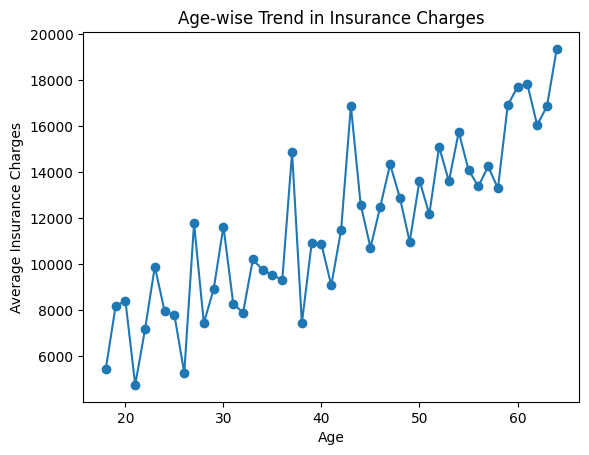

In [13]:
# Line Plot for Age-wise Trend in Insurance Charges
average_charges_by_age = insurance.groupby('age')['charges'].mean()
plt.plot(average_charges_by_age.index, average_charges_by_age.values, marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Average Insurance Charges')
plt.title('Age-wise Trend in Insurance Charges')
plt.show()

**Report :Age wise Trend**

The analysis conducted on insurance charges based on age reveals a clear and expected trend: as individuals age, their insurance charges tend to increase. This observation aligns with the natural progression of health risks and healthcare needs as people grow older.

---

# Insurance Charges by Gender and Smoking Status  Analysis

---
### Explanation

- The code generates a stacked bar plot to depict insurance charges categorized by gender and smoking status.
- It calculates the mean insurance charges grouped by both 'sex' and 'smoker' categories using the `groupby()` function and `unstack()` method.
- The width of each bar is set to 0.35 for visual clarity.
- An array 'x' is created using `np.arange()` to represent the x-axis positions of the bars.
- Two sets of bars are plotted using `plt.bar()`: one for non-smokers ('no' category) and another for smokers ('yes' category).
- The bars for smokers are positioned at the top of the bars for non-smokers, creating a stacked effect, achieved by setting the 'bottom' parameter to the values of non-smoker charges.
- The x-axis label is set to 'Gender', and the y-axis label is set to 'Average Insurance Charges'.
- The title of the plot is 'Insurance Charges by Gender and Smoking Status'.
- The x-axis tick labels are set using the 'charges_by_gender_smoker.index'.
- A legend is added to the plot with the title 'Smoker', positioned at the center using `bbox_to_anchor=(0.5, 0.5)` and `loc='center'`.
- Finally, the plot is displayed using `plt.show()`.

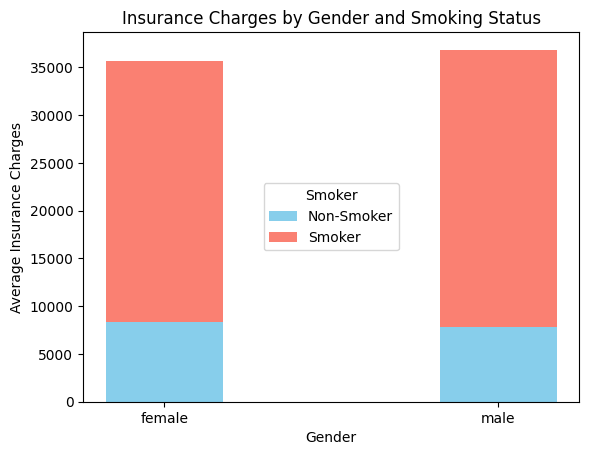

In [14]:
# Stacked Bar Plot for Insurance Charges by Gender and Smoking Status
charges_by_gender_smoker = insurance.groupby(['sex', 'smoker'])['charges'].mean().unstack()
bar_width = 0.35
x = np.arange(len(charges_by_gender_smoker.index))
plt.bar(x, charges_by_gender_smoker['no'], width=bar_width, label='Non-Smoker', color='skyblue')
plt.bar(x, charges_by_gender_smoker['yes'], width=bar_width, bottom=charges_by_gender_smoker['no'], label='Smoker', color='salmon')
plt.xlabel('Gender')
plt.ylabel('Average Insurance Charges')
plt.title('Insurance Charges by Gender and Smoking Status')
plt.xticks(x, charges_by_gender_smoker.index)

# Legend
plt.legend(title='Smoker', bbox_to_anchor=(0.5, 0.5), loc='center')

plt.show()

**Report :Insurance Charges by Gender and Smoking Status**


The data shows that people who don't smoke, both men and women, usually have lower insurance costs. But when it comes to smokers, there's an interesting difference between men and women. Women who smoke tend to have lower insurance charges compared to men who smoke.

This suggests that while smoking generally leads to higher insurance costs, there might be some differences between men and women in how these costs are determined.


---

# BMI vs. Charges

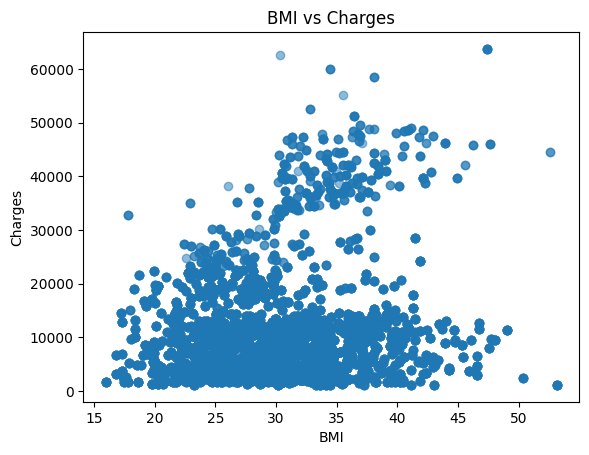

In [15]:
# Scatter Plot for BMI vs. Charges
plt.scatter(insurance['bmi'], insurance['charges'], alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges')
plt.show()

# Scatter Plot Matrix for Multivariate Analysis


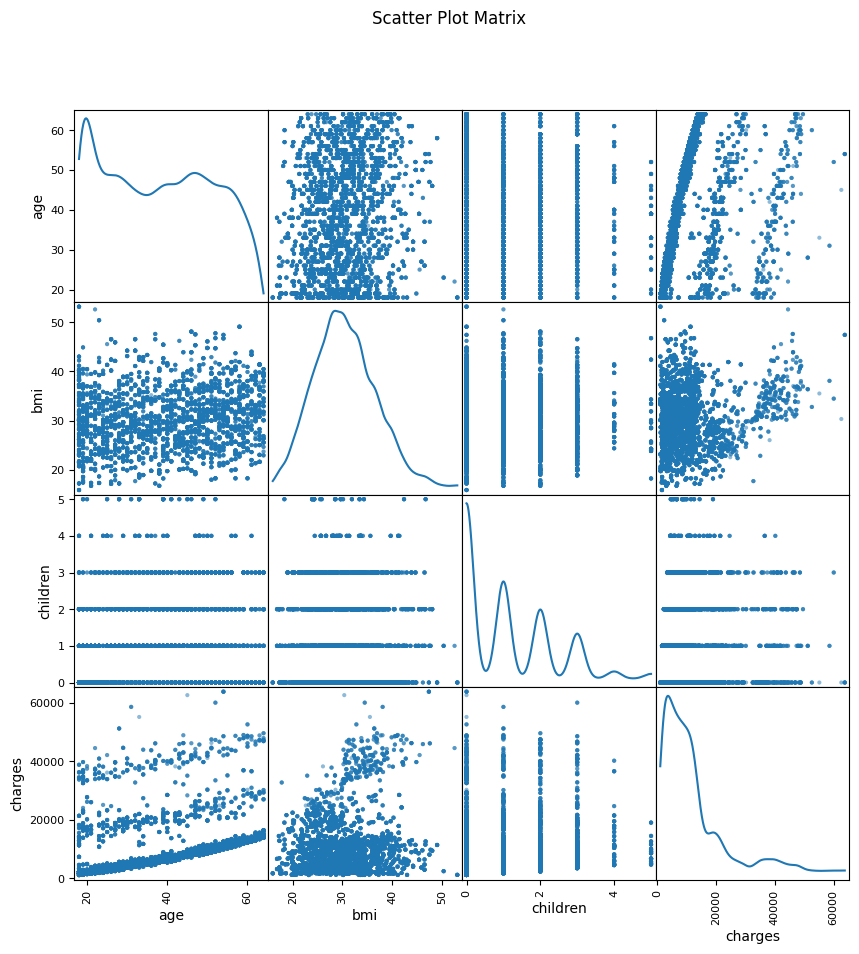

In [16]:
# Selecting variables for scatter plot matrix
variables = ['age', 'bmi', 'children', 'charges']

# Creating a scatter plot matrix
scatter_matrix = pd.plotting.scatter_matrix(insurance[variables], figsize=(10, 10), diagonal='kde', alpha=0.5)
plt.suptitle('Scatter Plot Matrix')
plt.show()

**Report**
 The scatter plot matrix displays pairwise relationships between age, BMI, number of children, and insurance charges, allowing for a comprehensive multivariate analysis of the data.

---

# Charges by gender Analysis

- The box plot is created using `plt.boxplot()` function.
- Two sets of insurance charges are passed as lists: one for males and another for females. These charges are filtered using boolean indexing based on gender.
- The `labels` parameter is set to ['Male', 'Female'] to label the two categories on the x-axis.
- The x-axis label is set to 'Gender' using `plt.xlabel()`.
- The y-axis label is set to 'Insurance Charges' using `plt.ylabel()`.
- The title of the plot is 'Insurance Charges by Gender', specified with `plt.title()`.
- Finally, the plot is displayed using `plt.show()`.

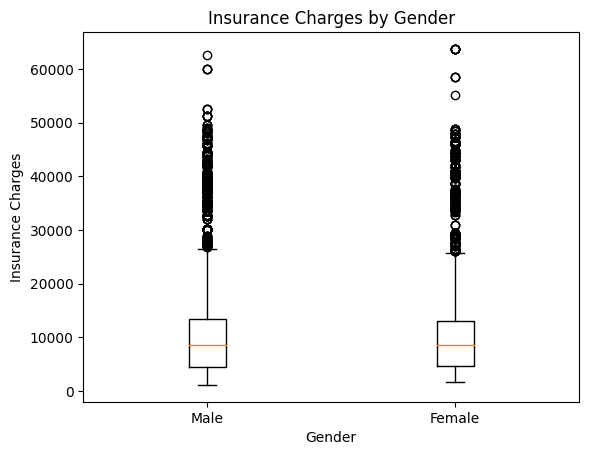

In [17]:
# Creating a box plot for charges by gender
plt.boxplot([insurance[insurance['sex'] == 'male']['charges'], insurance[insurance['sex'] == 'female']['charges']], labels=['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Insurance Charges')
plt.title('Insurance Charges by Gender')
plt.show()


# Insurance Charges by Number of Hospitalizations Analysis

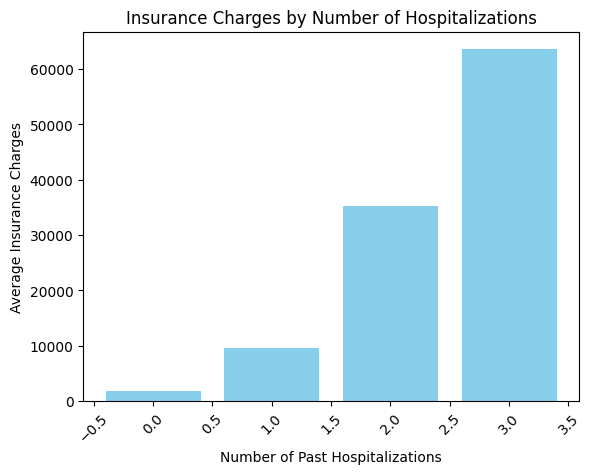

In [18]:
# Creating a bar plot for charges by number of hospitalizations
average_charges_by_hospitalizations = insurance.groupby('NUmber_of_past_hospitalizations')['charges'].mean()
plt.bar(average_charges_by_hospitalizations.index, average_charges_by_hospitalizations.values, color='skyblue')
plt.xlabel('Number of Past Hospitalizations')
plt.ylabel('Average Insurance Charges')
plt.title('Insurance Charges by Number of Hospitalizations')
plt.xticks(rotation=45)
plt.show()


**Report: Insurance Charges by Number of Hospitalizations**

The analysis reveals that insurance charges tend to rise with an increasing number of hospitalizations. As individuals experience more hospitalizations, their insurance costs also increase accordingly.

## Keep Exploring! 👀

Thank you for delving into this notebook! If you found it insightful or beneficial, I encourage you to explore more of my projects and contributions on my profile.

👉 [Visit my Profile](https://www.kaggle.com/zulqarnainalipk) 👈

[GitHub]( https://github.com/zulqarnainalipk) |
[LinkedIn]( https://www.linkedin.com/in/zulqarnainalipk/)

## Share Your Thoughts! 🙏

Your feedback is invaluable! Your insights and suggestions drive our ongoing improvement. If you have any comments, questions, or ideas to contribute, please feel free to reach out.

📬 Contact me via email: [zulqar445ali@gmail.com](mailto:zulqar445ali@gmail.com)

I extend my sincere gratitude for your time and engagement. Your support inspires me to create even more valuable content.
Happy coding and best of luck in your data science endeavors! 🚀
